<a href="https://colab.research.google.com/github/pchroscicki/data-science-bootcamp/blob/main/02_data_analysis/02_stock_market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study: Stock market data**

# **Import of Libraries**

In [1]:
import numpy as np
import pandas as pd

print(f'NumPy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

NumPy: 1.21.6
Pandas: 1.3.5


# **Data upload**

In [67]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations from stooq.pl
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-10-17 to 2017-10-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [68]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-17,110.1100,114.1900,110.090,113.7900,62781985
2022-10-14,114.1000,114.9600,106.600,106.9000,67737344
2022-10-13,107.8800,113.4400,105.345,112.5300,86868103
2022-10-12,112.4900,113.8300,111.400,112.9000,45728660
2022-10-11,112.7100,115.4800,110.390,112.2100,56432233
...,...,...,...,...,...
2017-10-25,48.9000,49.2220,48.312,48.6455,60603920
2017-10-24,48.4500,48.9925,48.250,48.7950,54271400
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440


# **Data mining**

In [69]:
df.head(10) #by default head() displays first 5 rows

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-17,110.11,114.19,110.090,113.79,62781985
2022-10-14,114.10,114.96,106.600,106.90,67737344
2022-10-13,107.88,113.44,105.345,112.53,86868103
2022-10-12,112.49,113.83,111.400,112.90,45728660
2022-10-11,112.71,115.48,110.390,112.21,56432233
2022-10-10,115.10,116.25,112.430,113.67,42339675
2022-10-07,118.00,118.17,113.880,114.56,54677980
2022-10-06,120.77,121.53,119.500,120.30,42253755
2022-10-05,118.58,121.75,117.690,120.95,48217535


In [70]:
df.tail(3) # last rows

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440
2017-10-20,49.6765,49.7310,49.100,49.1455,46874960
2017-10-19,49.5000,49.5525,49.012,49.3305,61712800


In [71]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [72]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2022-10-17,110.11,114.19,110.090,113.79,62781985
2022-10-14,114.10,114.96,106.600,106.90,67737344
2022-10-13,107.88,113.44,105.345,112.53,86868103
2022-10-12,112.49,113.83,111.400,112.90,45728660
2022-10-11,112.71,115.48,110.390,112.21,56432233


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.183642e+02,3.746200e+01,4.845000e+01,8.780000e+01,1.072490e+02,1.583380e+02,1.872000e+02
high,1257.0,1.197645e+02,3.788949e+01,4.899250e+01,8.851700e+01,1.090120e+02,1.599380e+02,1.886540e+02
low,1257.0,1.168227e+02,3.696593e+01,4.812500e+01,8.700000e+01,1.050090e+02,1.562500e+02,1.848400e+02
close,1257.0,1.183053e+02,3.738160e+01,4.831500e+01,8.787550e+01,1.074000e+02,1.581000e+02,1.865700e+02
volume,1257.0,8.610582e+07,4.119122e+07,1.762674e+07,5.830002e+07,7.439198e+07,1.022797e+08,3.310520e+08


# **Selection of columns**

In [74]:
df['open']

Date
2022-10-17    110.1100
2022-10-14    114.1000
2022-10-13    107.8800
2022-10-12    112.4900
2022-10-11    112.7100
                ...   
2017-10-25     48.9000
2017-10-24     48.4500
2017-10-23     49.3365
2017-10-20     49.6765
2017-10-19     49.5000
Name: open, Length: 1257, dtype: float64

In [75]:
df[['open', 'close']]

,open,close
Date,,
2022-10-17,110.1100,113.7900
2022-10-14,114.1000,106.9000
2022-10-13,107.8800,112.5300
2022-10-12,112.4900,112.9000
2022-10-11,112.7100,112.2100
...,...,...
2017-10-25,48.9000,48.6455
2017-10-24,48.4500,48.7950
2017-10-23,49.3365,48.3150


In [76]:
df.iloc[:, 0] #open

Date
2022-10-17    110.1100
2022-10-14    114.1000
2022-10-13    107.8800
2022-10-12    112.4900
2022-10-11    112.7100
                ...   
2017-10-25     48.9000
2017-10-24     48.4500
2017-10-23     49.3365
2017-10-20     49.6765
2017-10-19     49.5000
Name: open, Length: 1257, dtype: float64

In [77]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2022-10-17,110.1100,113.7900
2022-10-14,114.1000,106.9000
2022-10-13,107.8800,112.5300
2022-10-12,112.4900,112.9000
2022-10-11,112.7100,112.2100
...,...,...
2017-10-25,48.9000,48.6455
2017-10-24,48.4500,48.7950
2017-10-23,49.3365,48.3150


In [78]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-10-17,113.7900,62781985
2022-10-14,106.9000,67737344
2022-10-13,112.5300,86868103
2022-10-12,112.9000,45728660
2022-10-11,112.2100,56432233
...,...,...
2017-10-25,48.6455,60603920
2017-10-24,48.7950,54271400
2017-10-23,48.3150,69761440


In [79]:
df.iloc[:, -1] #last column

Date
2022-10-17    62781985
2022-10-14    67737344
2022-10-13    86868103
2022-10-12    45728660
2022-10-11    56432233
                ...   
2017-10-25    60603920
2017-10-24    54271400
2017-10-23    69761440
2017-10-20    46874960
2017-10-19    61712800
Name: volume, Length: 1257, dtype: int64

# **Selection of rows**

In [80]:
df.head()

,open,high,low,close,volume
Date,,,,,
2022-10-17,110.11,114.19,110.090,113.79,62781985
2022-10-14,114.10,114.96,106.600,106.90,67737344
2022-10-13,107.88,113.44,105.345,112.53,86868103
2022-10-12,112.49,113.83,111.400,112.90,45728660
2022-10-11,112.71,115.48,110.390,112.21,56432233


In [81]:
df.iloc[:3] #first 3 rows

,open,high,low,close,volume
Date,,,,,
2022-10-17,110.11,114.19,110.090,113.79,62781985
2022-10-14,114.10,114.96,106.600,106.90,67737344
2022-10-13,107.88,113.44,105.345,112.53,86868103


In [82]:
df.loc['2022-10-10' : '2022-10-17']

,open,high,low,close,volume
Date,,,,,
2022-10-17,110.11,114.19,110.090,113.79,62781985
2022-10-14,114.10,114.96,106.600,106.90,67737344
2022-10-13,107.88,113.44,105.345,112.53,86868103
2022-10-12,112.49,113.83,111.400,112.90,45728660
2022-10-11,112.71,115.48,110.390,112.21,56432233


# **Calculation of new columns**

In [83]:
df['average'] = (df.open + df.close) / 2
df

,open,high,low,close,volume,average
Date,,,,,,
2022-10-17,110.1100,114.1900,110.090,113.7900,62781985,111.95000
2022-10-14,114.1000,114.9600,106.600,106.9000,67737344,110.50000
2022-10-13,107.8800,113.4400,105.345,112.5300,86868103,110.20500
2022-10-12,112.4900,113.8300,111.400,112.9000,45728660,112.69500
2022-10-11,112.7100,115.4800,110.390,112.2100,56432233,112.46000
...,...,...,...,...,...,...
2017-10-25,48.9000,49.2220,48.312,48.6455,60603920,48.77275
2017-10-24,48.4500,48.9925,48.250,48.7950,54271400,48.62250
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440,48.82575


In [85]:
df = df.sort_index()
df.head(10)

,open,high,low,close,volume,average
Date,,,,,,
2017-10-19,49.5000,49.5525,49.0120,49.3305,61712800,49.41525
2017-10-20,49.6765,49.7310,49.1000,49.1455,46874960,49.41100
2017-10-23,49.3365,49.3365,48.1250,48.3150,69761440,48.82575
2017-10-24,48.4500,48.9925,48.2500,48.7950,54271400,48.62250
2017-10-25,48.9000,49.2220,48.3120,48.6455,60603920,48.77275
2017-10-26,49.0165,49.1450,48.4275,48.6215,108428620,48.81900
2017-10-27,52.8505,55.2790,52.5275,55.0475,331051960,53.94900
2017-10-30,54.7505,56.1395,54.6780,55.5425,132261280,55.14650
2017-10-31,55.4500,55.5270,55.0560,55.2640,69539340,55.35700


In [86]:
df['close_shift'] = df.close.shift(1)
df

,open,high,low,close,volume,average,close_shift
Date,,,,,,,
2017-10-19,49.5000,49.5525,49.012,49.3305,61712800,49.41525,NaN
2017-10-20,49.6765,49.7310,49.100,49.1455,46874960,49.41100,49.3305
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440,48.82575,49.1455
2017-10-24,48.4500,48.9925,48.250,48.7950,54271400,48.62250,48.3150
2017-10-25,48.9000,49.2220,48.312,48.6455,60603920,48.77275,48.7950
...,...,...,...,...,...,...,...
2022-10-11,112.7100,115.4800,110.390,112.2100,56432233,112.46000,113.6700
2022-10-12,112.4900,113.8300,111.400,112.9000,45728660,112.69500,112.2100
2022-10-13,107.8800,113.4400,105.345,112.5300,86868103,110.20500,112.9000


In [87]:
df['daily_change'] = df.close / df.close_shift -1
df.head()

,open,high,low,close,volume,average,close_shift,daily_change
Date,,,,,,,,
2017-10-19,49.5000,49.5525,49.012,49.3305,61712800,49.41525,NaN,NaN
2017-10-20,49.6765,49.7310,49.100,49.1455,46874960,49.41100,49.3305,-0.003750
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440,48.82575,49.1455,-0.016899
2017-10-24,48.4500,48.9925,48.250,48.7950,54271400,48.62250,48.3150,0.009935
2017-10-25,48.9000,49.2220,48.312,48.6455,60603920,48.77275,48.7950,-0.003064


In [88]:
del df['close_shift']
df.head()

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2017-10-19,49.5000,49.5525,49.012,49.3305,61712800,49.41525,NaN
2017-10-20,49.6765,49.7310,49.100,49.1455,46874960,49.41100,-0.003750
2017-10-23,49.3365,49.3365,48.125,48.3150,69761440,48.82575,-0.016899
2017-10-24,48.4500,48.9925,48.250,48.7950,54271400,48.62250,0.009935
2017-10-25,48.9000,49.2220,48.312,48.6455,60603920,48.77275,-0.003064


In [89]:
df.daily_change.min()

-0.14048798030374288

In [90]:
df.daily_change.max()

0.13535859873528944

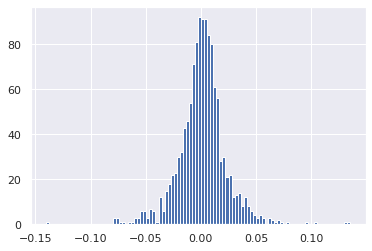

In [93]:
# histogram
import seaborn as sns
sns.set()

df.daily_change.hist(bins=100)

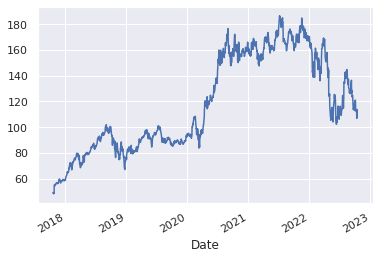

In [94]:
df.close.plot()

# **Data filtering**

In [100]:
df_positive = df[df.daily_change > 0]
df_positive

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2017-10-24,48.4500,48.9925,48.2500,48.7950,54271400,48.62250,0.009935
2017-10-27,52.8505,55.2790,52.5275,55.0475,331051960,53.94900,0.132164
2017-10-30,54.7505,56.1395,54.6780,55.5425,132261280,55.14650,0.008992
2017-11-03,54.5575,55.6340,54.4260,55.5800,75029600,55.06875,0.015883
2017-11-06,55.4575,56.2705,55.4385,56.0330,66634760,55.74525,0.008150
...,...,...,...,...,...,...,...
2022-09-28,114.3800,118.7000,113.8000,118.0100,55763750,116.19500,0.031466
2022-10-03,113.5800,116.9100,112.4500,115.8800,50941854,114.73000,0.025487
2022-10-04,119.8900,123.0000,119.7900,121.0900,62812564,120.49000,0.044960


In [101]:
df_positive.daily_change.mean()

0.01527270636549848

In [102]:
df_negative = df[df.daily_change < 0]
df_negative

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2017-10-20,49.6765,49.7310,49.1000,49.1455,46874960,49.41100,-0.003750
2017-10-23,49.3365,49.3365,48.1250,48.3150,69761440,48.82575,-0.016899
2017-10-25,48.9000,49.2220,48.3120,48.6455,60603920,48.77275,-0.003064
2017-10-26,49.0165,49.1450,48.4275,48.6215,108428620,48.81900,-0.000493
2017-10-31,55.4500,55.5270,55.0560,55.2640,69539340,55.35700,-0.005014
...,...,...,...,...,...,...,...
2022-10-07,118.0000,118.1700,113.8800,114.5600,54677980,116.28000,-0.047714
2022-10-10,115.1000,116.2500,112.4300,113.6700,42339675,114.38500,-0.007769
2022-10-11,112.7100,115.4800,110.3900,112.2100,56432233,112.46000,-0.012844


In [103]:
df_negative.daily_change.mean()

-0.01564545294282466

In [104]:
df.close == df.high

Date
2017-10-19    False
2017-10-20    False
2017-10-23    False
2017-10-24    False
2017-10-25    False
              ...  
2022-10-11    False
2022-10-12    False
2022-10-13    False
2022-10-14    False
2022-10-17    False
Length: 1257, dtype: bool

In [105]:
df[df.close == df.high]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2018-01-05,60.8755,61.4570,60.5000,61.4570,70731320,61.16625,0.016120
2018-01-10,62.2575,62.7165,61.8615,62.7165,53654260,62.48700,0.001301
2018-02-23,74.7670,75.0000,74.3250,75.0000,88144160,74.88350,0.009870
2018-05-09,80.0000,80.4000,79.6000,80.4000,72746040,80.20000,0.009803
2018-05-23,78.5525,80.0930,78.3170,80.0930,67237840,79.32275,0.012938
2019-12-23,89.4130,89.6500,89.2255,89.6500,42749860,89.53150,0.003638
2020-01-02,93.7500,94.9005,93.2075,94.9005,80718200,94.32525,0.027151
2020-05-29,120.7970,122.1180,119.9100,122.1180,70586580,121.45750,0.017184
2021-04-09,165.2350,168.6100,164.4450,168.6100,86829460,166.92250,0.022096


In [107]:
df[df.close == df.low]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2018-02-07,72.450,73.0495,70.7575,70.7575,142705120,71.60375,-0.019191
2019-07-17,100.352,100.6000,99.6015,99.6015,51176180,99.97675,-0.008891
2022-01-05,166.883,167.1260,164.3570,164.3570,64302720,165.62000,-0.018893


In [109]:
df.index > '2021-01-01'

array([False, False, False, ...,  True,  True,  True])

In [110]:
df[df.index > '2021-01-01']

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2021-01-04,163.500,163.600,157.201,159.332,88228980,161.4160,-0.021579
2021-01-05,158.300,161.169,158.253,160.926,53110960,159.6130,0.010004
2021-01-06,157.324,159.875,156.558,156.919,87896300,157.1215,-0.024900
2021-01-07,157.850,160.427,157.750,158.108,70290900,157.9790,0.007577
2021-01-08,159.000,159.532,157.110,159.135,70754880,159.0675,0.006496
...,...,...,...,...,...,...,...
2022-10-11,112.710,115.480,110.390,112.210,56432233,112.4600,-0.012844
2022-10-12,112.490,113.830,111.400,112.900,45728660,112.6950,0.006149
2022-10-13,107.880,113.440,105.345,112.530,86868103,110.2050,-0.003277


In [113]:
# and
df[(df.index >= '2021-01-04') & (df.index < '2021-01-15')]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2021-01-04,163.500,163.600,157.201,159.332,88228980,161.4160,-0.021579
2021-01-05,158.300,161.169,158.253,160.926,53110960,159.6130,0.010004
2021-01-06,157.324,159.875,156.558,156.919,87896300,157.1215,-0.024900
2021-01-07,157.850,160.427,157.750,158.108,70290900,157.9790,0.007577
2021-01-08,159.000,159.532,157.110,159.135,70754880,159.0675,0.006496
2021-01-11,157.401,157.819,155.500,155.710,73381900,156.5555,-0.021523
2021-01-12,156.000,157.107,154.300,156.041,70291640,156.0205,0.002126
2021-01-13,156.422,159.498,156.104,158.294,66424880,157.3580,0.014439
2021-01-14,158.376,158.900,156.030,156.373,61418380,157.3745,-0.012136


In [116]:
# or
df[(df.index == '2021-01-06') | (df.index == '2021-01-12')]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2021-01-06,157.324,159.875,156.558,156.919,87896300,157.1215,-0.024900
2021-01-12,156.000,157.107,154.300,156.041,70291640,156.0205,0.002126


In [118]:
# by months
df[df.index.month == 5]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2018-05-01,78.1610,79.2500,77.6090,79.1130,91441420,78.63700,0.010299
2018-05-02,79.0490,79.4250,78.3180,78.4840,87205460,78.76650,-0.007951
2018-05-03,78.0005,78.7400,77.3010,78.6040,85038340,78.30225,0.001529
2018-05-04,78.1225,79.2450,78.1095,79.0475,68871340,78.58500,0.005642
2018-05-07,79.4670,80.3475,79.3915,80.0070,76037100,79.73700,0.012138
...,...,...,...,...,...,...,...
2022-05-24,104.0250,105.4000,101.2600,104.1000,102934680,104.06250,-0.032141
2022-05-25,103.6560,108.1750,103.6500,106.7750,93120100,105.21550,0.025696
2022-05-26,107.9700,112.6650,107.4540,111.0780,93002600,109.52400,0.040300


In [120]:
# by year
df[df.index.year == 2020]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2020-01-02,93.750,94.9005,93.2075,94.9005,80718200,94.32525,0.027151
2020-01-03,93.225,94.3100,93.2250,93.7485,75332080,93.48675,-0.012139
2020-01-06,93.000,95.1845,93.0000,95.1440,81313960,94.07200,0.014886
2020-01-07,95.225,95.6945,94.6020,95.3430,82680200,95.28400,0.002092
2020-01-08,94.902,95.5500,94.3220,94.5985,70239320,94.75025,-0.007809
...,...,...,...,...,...,...,...
2020-12-24,159.695,160.1000,158.4500,158.6340,29038340,159.16450,-0.003956
2020-12-28,159.700,165.2000,158.6340,164.1980,113735740,161.94900,0.035074
2020-12-29,165.497,167.5320,164.0610,166.1000,97458660,165.79850,0.011584


In [121]:
# by day
df[df.index.day == 1]

,open,high,low,close,volume,average,daily_change
Date,,,,,,,
2017-11-01,55.2700,55.4485,54.8370,55.1840,75110220,55.22700,-0.001448
2017-12-01,58.6025,58.9825,57.6000,58.1175,82030140,58.36000,-0.012237
2018-02-01,72.2500,72.9940,69.2570,69.5000,180185900,70.87500,-0.041967
2018-03-01,75.6800,75.9245,73.2500,74.6725,136704600,75.17625,-0.012562
2018-05-01,78.1610,79.2500,77.6090,79.1130,91441420,78.63700,0.010299
2018-06-01,81.8515,82.3365,81.7545,82.0770,66267700,81.96425,0.007315
2018-08-01,89.2000,89.9220,88.8010,89.8585,83061920,89.52925,0.011100
2018-10-01,101.1000,101.6600,100.1800,100.2180,69365700,100.65900,0.000679
2018-11-01,81.1765,83.5225,79.9220,83.2765,162710780,82.22650,0.042253
